In [32]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Probit
import statsmodels.api as sm
import matplotlib.pyplot as plt

## probit 正規分布関数 (normal cumulative distribution)：p(x)=∫ a+bx∞ ϕ(t)dt ϕ()

変数が増えると probit と logit　で変わるらしい

＊線形確率モデルは普通の回帰で確率をやった時のことをいう

In [3]:
df = pd.read_csv("http://mcobaya.web.fc2.com/rats.csv")

In [4]:
df

,Unnamed: 0,xn,yn
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
...,...,...,...
131,132,100,1
132,133,100,1
133,134,100,1
134,135,100,1


In [10]:
Y = df["yn"]
X = sm.add_constant(df['xn'])
model = Probit(Y, X.astype(float))
probit_model = model.fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.256009
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                     yn   No. Observations:                  136
Model:                         Probit   Df Residuals:                      134
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:                  0.6206
Time:                        18:51:49   Log-Likelihood:                -34.817
converged:                       True   LL-Null:                       -91.767
Covariance Type:            nonrobust   LLR p-value:                 1.370e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7362      0.241     -7.206      0.000      -2.208      -1.264
xn             0.0519      0.

In [30]:
list1 = [i for i in range(101)]
#probs2 = lr.predict_proba(np.reshape(list1, (-1, 1)))
pred = probit_model.predict(X)

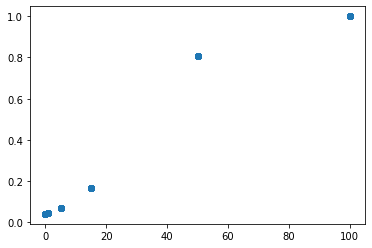

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['xn'], pred)

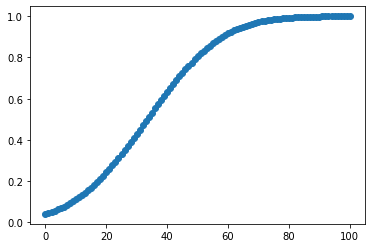

In [42]:
list1 = [i for i in range(101)]
X_all = sm.add_constant(list1)
#probs2 = lr.predict_proba(np.reshape(list1, (-1, 1)))
pred = probit_model.predict(X_all)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list1, pred)